<a href="https://colab.research.google.com/github/mmcquade84/data-analysis/blob/main/Quantitative_Credit_Risk_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.01
R^2 Score: 1.00


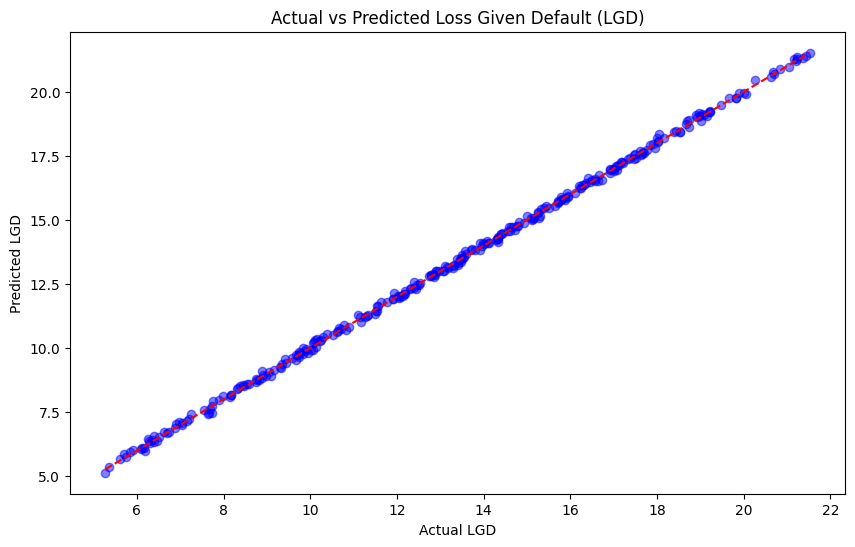

In [9]:
!pip install pandas numpy matplotlib scikit-learn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 70, n_samples)
income = np.random.randint(20000, 150000, n_samples)
loan_amount = np.random.randint(5000, 50000, n_samples)
loan_term = np.random.randint(1, 30, n_samples)
lgd = 0.1 * age + 0.0001 * income - 0.3 * loan_amount / 50000 + 0.05 * loan_term + np.random.normal(0, 0.1, n_samples)

df = pd.DataFrame({
    'age': age,
    'income': income,
    'loan_amount': loan_amount,
    'loan_term': loan_term,
    'lgd': lgd
})
df.head()

X = df[['age', 'income', 'loan_amount', 'loan_term']]
y = df['lgd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Loss Given Default (LGD)')
plt.xlabel('Actual LGD')
plt.ylabel('Predicted LGD')
plt.show()

**Linear Regression for Loss Given Default (LGD):**
The plot displays the relationship between the actual and predicted Loss Given Default (LGD) values. Each point represents a test sample, with the x-axis showing the actual LGD values and the y-axis showing the predicted LGD values. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values.

The tight clustering of points along the red line indicates that the linear regression model has high predictive accuracy, as the predicted LGD values closely match the actual LGD values. This signifies that the model is effective in estimating the loss given default based on the provided features.

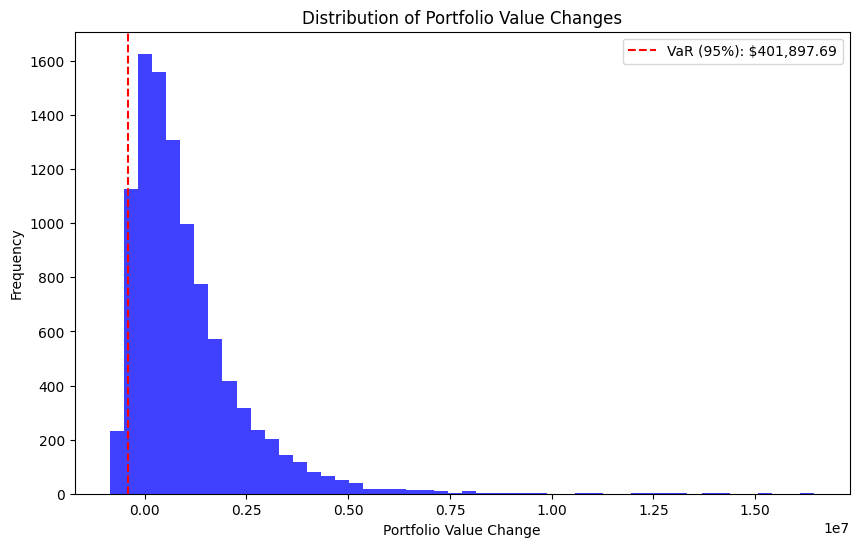

In [11]:
!pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_days = 1000
mean_return = 0.0005
std_dev = 0.02
returns = np.random.normal(mean_return, std_dev, n_days)

df = pd.DataFrame({'returns': returns})
df.head()

initial_investment = 1000000
n_simulations = 10000
n_days = len(df)

simulated_values = np.zeros((n_simulations, n_days))
for i in range(n_simulations):
    daily_returns = np.random.normal(mean_return, std_dev, n_days)
    simulated_values[i, :] = initial_investment * np.exp(np.cumsum(daily_returns))

daily_changes = simulated_values[:, -1] - initial_investment

var_95 = np.percentile(daily_changes, 5)

plt.figure(figsize=(10, 6))
plt.hist(daily_changes, bins=50, alpha=0.75, color='blue')
plt.axvline(x=var_95, color='red', linestyle='--', label=f'VaR (95%): ${-var_95:,.2f}')
plt.title('Distribution of Portfolio Value Changes')
plt.xlabel('Portfolio Value Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Monte Carlo Simulation for Value at Risk (VaR):**
The 95% VaR indicates there is a 5% chance that the portfolio could lose more than $401,897.69. This is a significant potential loss and should be considered in decision-making. The decision to proceed depends on the organization's risk tolerance. Compare the potential loss with the expected return of the project. If the expected returns justify the risks, it may still be worth proceeding.VaR is just one measure of risk. It’s essential to consider other factors such as market conditions, project specifics, and strategic objectives.

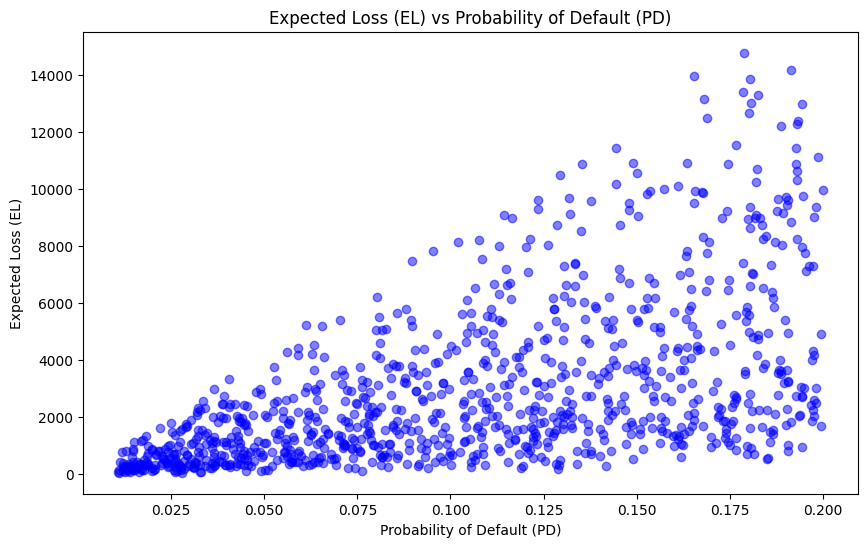

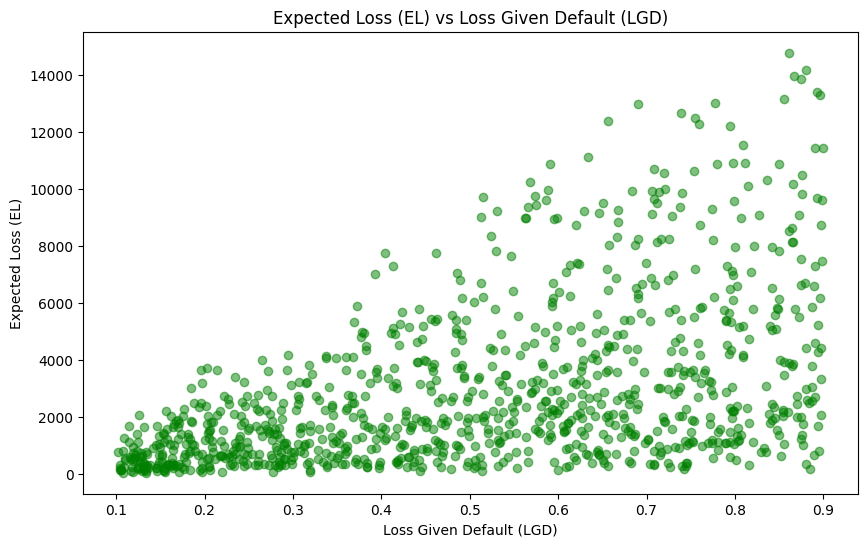

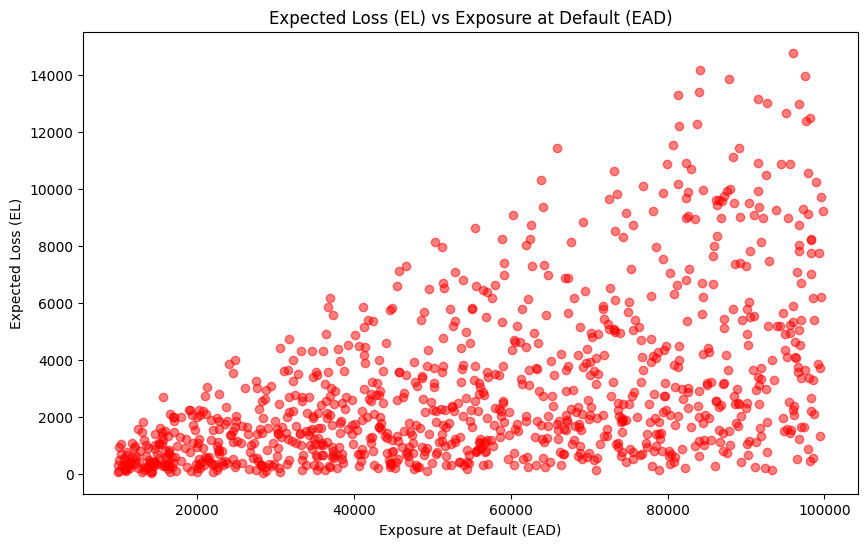

In [14]:
!pip install pandas numpy matplotlib scikit-learn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000
pd_values = np.random.uniform(0.01, 0.2, n_samples)  # Probability of Default (PD)
lgd_values = np.random.uniform(0.1, 0.9, n_samples)  # Loss Given Default (LGD)
ead_values = np.random.uniform(10000, 100000, n_samples)  # Exposure at Default (EAD)

el_values = pd_values * lgd_values * ead_values

df = pd.DataFrame({
    'PD': pd_values,
    'LGD': lgd_values,
    'EAD': ead_values,
    'EL': el_values
})
df.head()

plt.figure(figsize=(10, 6))
plt.scatter(df['PD'], df['EL'], alpha=0.5, color='blue')
plt.title('Expected Loss (EL) vs Probability of Default (PD)')
plt.xlabel('Probability of Default (PD)')
plt.ylabel('Expected Loss (EL)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['LGD'], df['EL'], alpha=0.5, color='green')
plt.title('Expected Loss (EL) vs Loss Given Default (LGD)')
plt.xlabel('Loss Given Default (LGD)')
plt.ylabel('Expected Loss (EL)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['EAD'], df['EL'], alpha=0.5, color='red')
plt.title('Expected Loss (EL) vs Exposure at Default (EAD)')
plt.xlabel('Exposure at Default (EAD)')
plt.ylabel('Expected Loss (EL)')
plt.show()

**Expected Loss (EL) Model:**
 The first chart shows a positive correlation between LGD and EL. As the LGD increases, the Expected Loss also tends to increase. This is because a higher LGD means that a larger portion of the exposure is lost in the event of a default, leading to a higher expected loss.
 The second chart shows a positive correlation between EAD and EL. As the EAD increases, the Expected Loss also tends to increase. This is because a higher EAD means that a larger amount is exposed to default risk, leading to a higher expected loss.

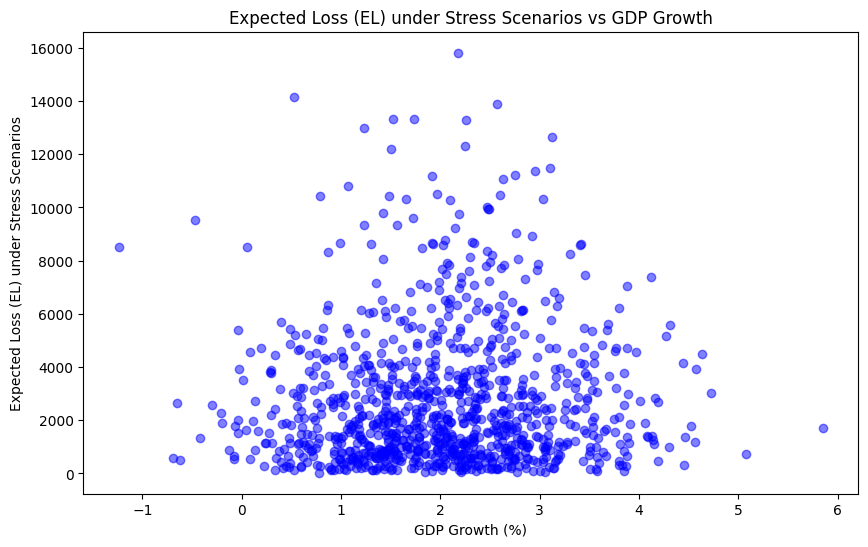

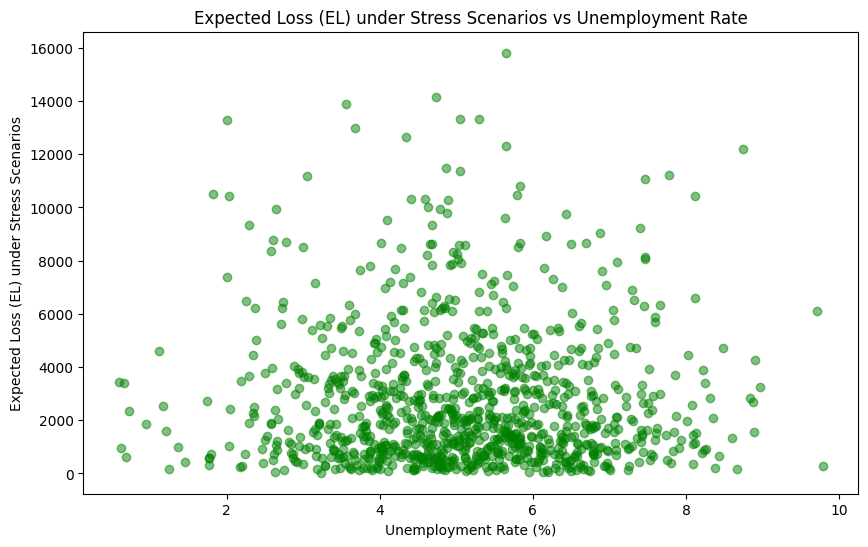

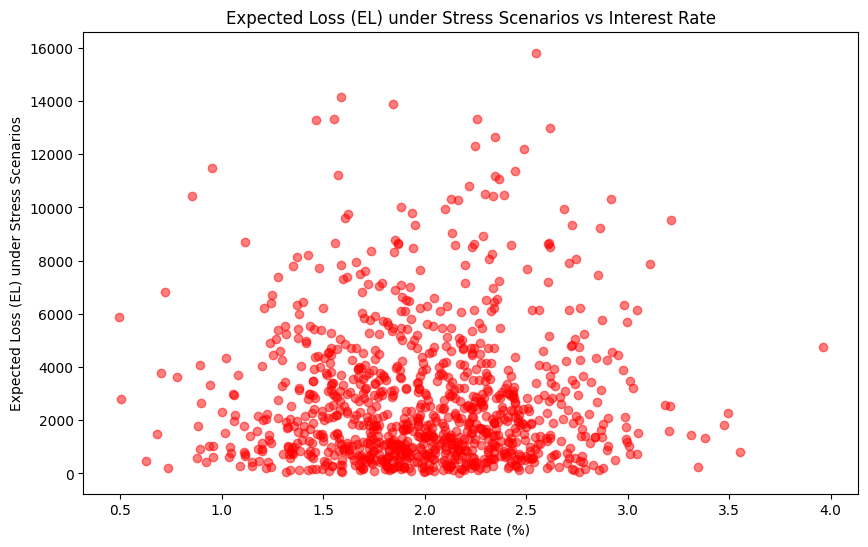

In [15]:
!pip install pandas numpy matplotlib scikit-learn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000
gdp_growth = np.random.normal(2, 1, n_samples)  # GDP growth rate (%)
unemployment_rate = np.random.normal(5, 1.5, n_samples)  # Unemployment rate (%)
interest_rate = np.random.normal(2, 0.5, n_samples)  # Interest rate (%)
pd_base = np.random.uniform(0.01, 0.2, n_samples)  # Base Probability of Default (PD)

gdp_shock = gdp_growth - np.random.uniform(1, 3, n_samples)
unemployment_shock = unemployment_rate + np.random.uniform(1, 3, n_samples)
interest_rate_shock = interest_rate + np.random.uniform(0.5, 1.5, n_samples)

pd_stress = pd_base * (1 + 0.5 * (unemployment_shock - unemployment_rate) / 100 + 0.5 * (interest_rate_shock - interest_rate) / 100)

lgd = np.random.uniform(0.1, 0.9, n_samples)
ead = np.random.uniform(10000, 100000, n_samples)

el_stress = pd_stress * lgd * ead

df = pd.DataFrame({
    'GDP Growth': gdp_growth,
    'Unemployment Rate': unemployment_rate,
    'Interest Rate': interest_rate,
    'PD Base': pd_base,
    'PD Stress': pd_stress,
    'LGD': lgd,
    'EAD': ead,
    'EL Stress': el_stress
})
df.head()

plt.figure(figsize=(10, 6))
plt.scatter(df['GDP Growth'], df['EL Stress'], alpha=0.5, color='blue')
plt.title('Expected Loss (EL) under Stress Scenarios vs GDP Growth')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Expected Loss (EL) under Stress Scenarios')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Unemployment Rate'], df['EL Stress'], alpha=0.5, color='green')
plt.title('Expected Loss (EL) under Stress Scenarios vs Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Expected Loss (EL) under Stress Scenarios')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Interest Rate'], df['EL Stress'], alpha=0.5, color='red')
plt.title('Expected Loss (EL) under Stress Scenarios vs Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Expected Loss (EL) under Stress Scenarios')
plt.show()

**Stress Testing Model:**
The first chart shows the impact of changes in GDP growth on the expected loss. Generally, lower GDP growth rates are associated with higher expected losses, indicating increased credit risk during economic downturns.
The second chart illustrates the relationship between unemployment rates and expected loss. Higher unemployment rates typically lead to higher expected losses, reflecting the increased probability of defaults during periods of high unemployment.
The third chart depicts the effect of changes in interest rates on expected loss. Higher interest rates are generally associated with higher expected losses, as increased borrowing costs can lead to higher default rates.

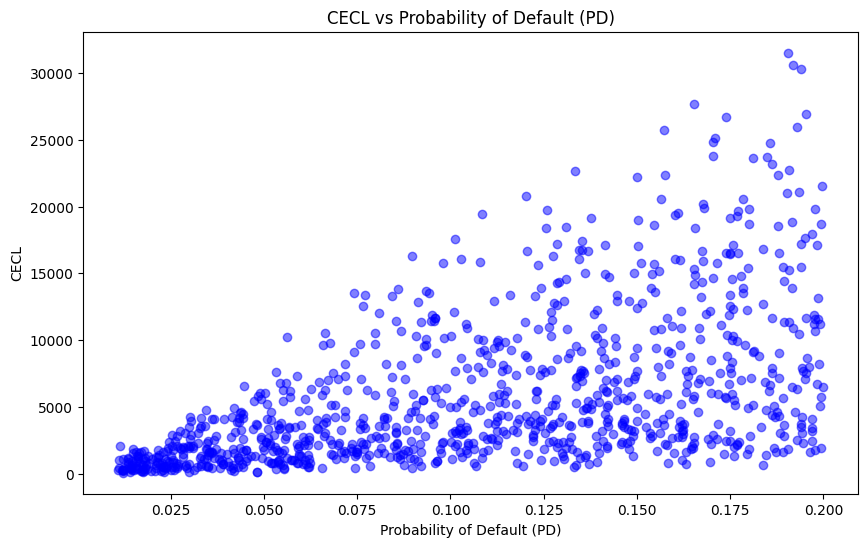

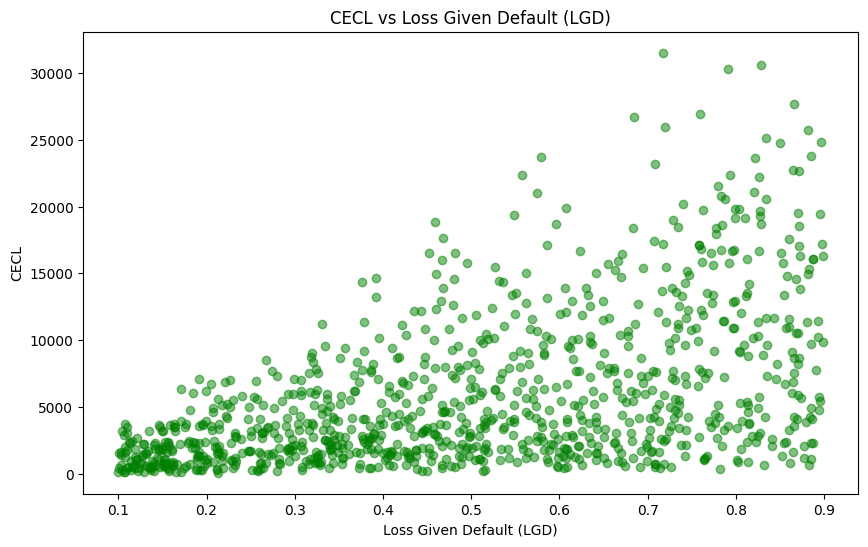

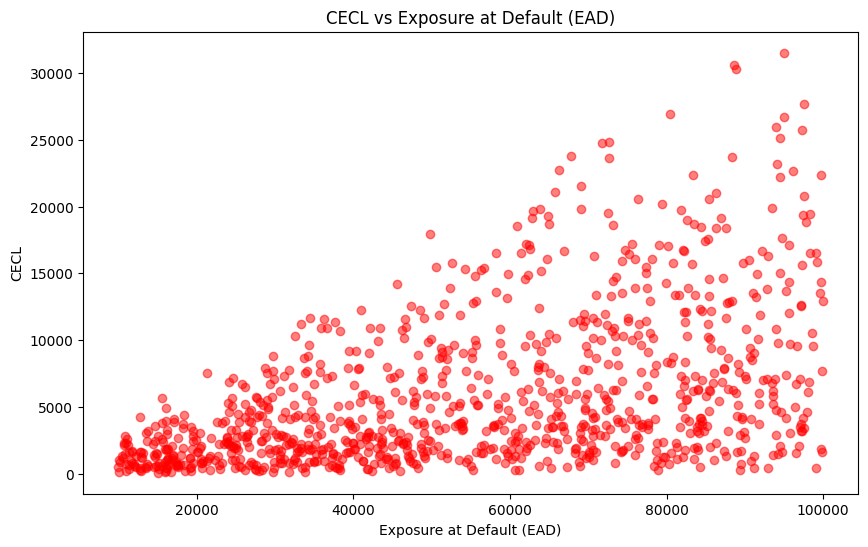

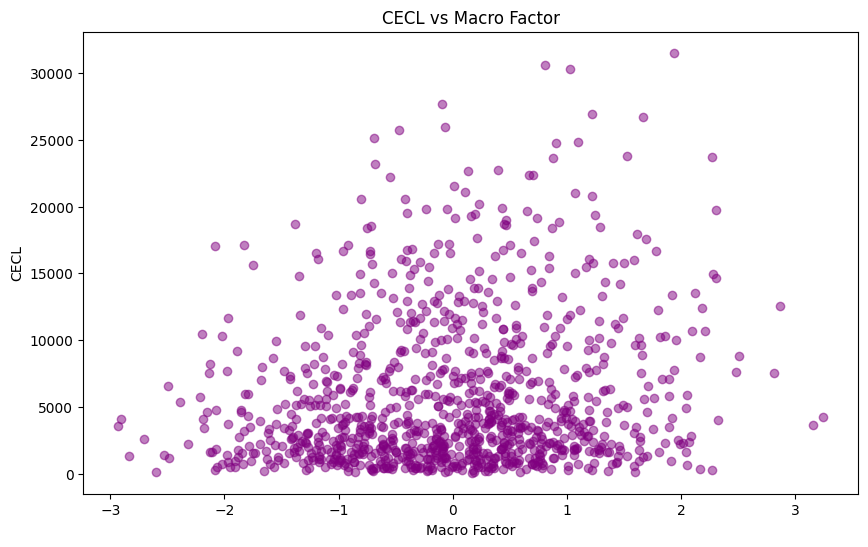

In [16]:
!pip install pandas numpy matplotlib scikit-learn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n_samples = 1000
years = np.random.randint(1, 10, n_samples)  # Number of years to maturity
pd_values = np.random.uniform(0.01, 0.2, n_samples)  # Probability of Default (PD)
lgd_values = np.random.uniform(0.1, 0.9, n_samples)  # Loss Given Default (LGD)
ead_values = np.random.uniform(10000, 100000, n_samples)  # Exposure at Default (EAD)
macro_factor = np.random.normal(0, 1, n_samples)  # Macro-economic factor

historical_losses = pd_values * lgd_values * ead_values

future_pd_values = pd_values * (1 + 0.1 * macro_factor)
future_lgd_values = lgd_values * (1 + 0.1 * macro_factor)

future_losses = future_pd_values * future_lgd_values * ead_values

cecl = historical_losses + future_losses

df = pd.DataFrame({
    'Years': years,
    'PD': pd_values,
    'LGD': lgd_values,
    'EAD': ead_values,
    'Macro Factor': macro_factor,
    'Historical Losses': historical_losses,
    'Future PD': future_pd_values,
    'Future LGD': future_lgd_values,
    'Future Losses': future_losses,
    'CECL': cecl
})
df.head()

plt.figure(figsize=(10, 6))
plt.scatter(df['PD'], df['CECL'], alpha=0.5, color='blue')
plt.title('CECL vs Probability of Default (PD)')
plt.xlabel('Probability of Default (PD)')
plt.ylabel('CECL')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['LGD'], df['CECL'], alpha=0.5, color='green')
plt.title('CECL vs Loss Given Default (LGD)')
plt.xlabel('Loss Given Default (LGD)')
plt.ylabel('CECL')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['EAD'], df['CECL'], alpha=0.5, color='red')
plt.title('CECL vs Exposure at Default (EAD)')
plt.xlabel('Exposure at Default (EAD)')
plt.ylabel('CECL')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Macro Factor'], df['CECL'], alpha=0.5, color='purple')
plt.title('CECL vs Macro Factor')
plt.xlabel('Macro Factor')
plt.ylabel('CECL')
plt.show()


**CECL Model:**
The first chart shows a positive correlation between the Probability of Default (PD) and CECL. As PD increases, CECL also increases, indicating that higher default probabilities lead to higher expected credit losses.
The second chart demonstrates that as the Loss Given Default (LGD) increases, the CECL also tends to increase. This indicates that higher losses in the event of default lead to higher expected credit losses.
The third chart shows a positive correlation between Exposure at Default (EAD) and CECL. As EAD increases, CECL also increases, indicating that higher exposure amounts lead to higher expected credit losses.
The fourth chart illustrates the impact of macroeconomic conditions on CECL. Variations in the macro factor affect the expected credit losses, indicating that economic conditions play a significant role in determining credit risk.